Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

df_citybike = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/citybike_data.csv')
df_yelp = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/yelp_data.csv')

merged_df = pd.merge(df_yelp, df_citybike, left_on='station_id', right_on='uid', how='inner')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

The following visualization shows that the median distance from the businesses to the bike stations is 146 meters, which is very good. However, it also indicates that we could place more businesses around the bike stations.

Median distance from businesses to bike stations: 146.00 km


<function matplotlib.pyplot.show(close=None, block=None)>

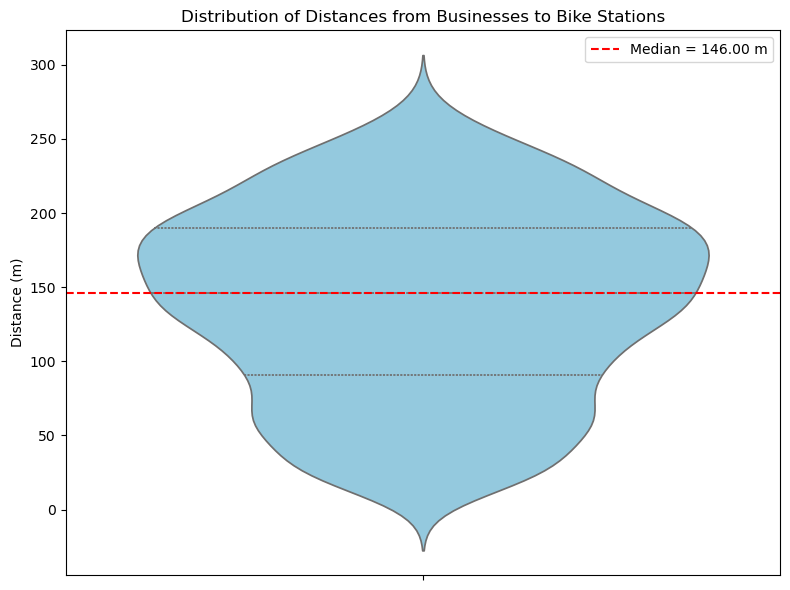

In [ ]:
# Calculate the median distance
median_distance = merged_df['distance'].median()
print(f"Median distance from businesses to bike stations: {median_distance:.2f} km")

# Plot the distribution of distances
plt.figure(figsize=(8, 6))
sns.violinplot(data=merged_df, y='distance', color='skyblue', inner='quartile')
plt.axhline(median_distance, color='red', linestyle='--', label=f'Median = {median_distance:.2f} m')
plt.title('Distribution of Distances from Businesses to Bike Stations')
plt.ylabel('Distance (m)')
plt.legend()
plt.tight_layout()
plt.show

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
from sqlalchemy import create_engine, Column, String, Float, Integer, ForeignKey
from sqlalchemy.orm import declarative_base, relationship, sessionmaker
import pandas as pd

# Define the base
Base = declarative_base()

# Define CityBike table
class CityBike(Base):
    __tablename__ = 'citybike'
    __table_args__ = {'extend_existing': True}  

    uid = Column(String, primary_key=True)
    latitude = Column(Float, nullable=False)
    longitude = Column(Float, nullable=False)
    free_bikes = Column(Integer, nullable=True)

    yelp_data = relationship("Yelp", back_populates="citybike_station")
    foursquare_data = relationship("Foursquare", back_populates="citybike_station")

# Define Yelp table
class Yelp(Base):
    __tablename__ = 'yelp'
    __table_args__ = {'extend_existing': True}  # 

    id = Column(Integer, primary_key=True, autoincrement=True)  
    station_id = Column(String, ForeignKey('citybike.uid'), nullable=False)
    name = Column(String, nullable=False)
    category = Column(String, nullable=True)
    distance = Column(Float, nullable=True)
    rating = Column(Float, nullable=True)
    review_count = Column(Integer, nullable=True)
    price = Column(Integer, nullable=True)

    citybike_station = relationship("CityBike", back_populates="yelp_data")

# Define Foursquare table
class Foursquare(Base):
    __tablename__ = 'foursquare'
    __table_args__ = {'extend_existing': True}  
    
    id = Column(Integer, primary_key=True, autoincrement=True)  
    station_id = Column(String, ForeignKey('citybike.uid'), nullable=False)
    name = Column(String, nullable=False)
    distance = Column(Float, nullable=True)
    rating = Column(Float, nullable=True)
    popularity = Column(Float, nullable=True)
    price = Column(Integer, nullable=True)
    hours = Column(String, nullable=True)
    hours_popular = Column(String, nullable=True)
    category = Column(String, nullable=True)

    citybike_station = relationship("CityBike", back_populates="foursquare_data")

# Initialize SQLite database
engine = create_engine('sqlite:///citybike_db.sqlite', echo=True)
Base.metadata.create_all(engine)

# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# Load data from CSV files
citybike_df = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/citybike_data.csv')  
yelp_df = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/yelp_data.csv')  
foursquare_df = pd.read_csv('/home/t0si/Statistical_Modelling_Project/data/foursquare_data.csv')  

# Insert CityBike data
for _, row in citybike_df.iterrows():
    session.add(CityBike(
        uid=row['uid'],
        latitude=row['latitude'],
        longitude=row['longitude'],
        free_bikes=row.get('free_bikes', None)
    ))

# Insert Yelp data
for _, row in yelp_df.iterrows():
    session.add(Yelp(
        station_id=row['station_id'],
        name=row['name'],
        category=row['category'],
        distance=row.get('distance', None),
        rating=row.get('rating', None),
        review_count=row.get('review_count', None),
        price=row.get('price', None)
    ))

# Insert Foursquare data
for _, row in foursquare_df.iterrows():
    session.add(Foursquare(
        station_id=row['station_id'],
        name=row['name'],
        distance=row.get('distance', None),
        rating=row.get('rating', None),
        popularity=row.get('popularity', None),
        price=row.get('price', None),
        hours=row.get('hours', None),
        hours_popular=row.get('hours_popular', None),
        category=row.get('category', 'Unknown')
    ))



# Commit the session
try:
    session.commit()
    print("Data successfully inserted into the database.")
except Exception as e:
    session.rollback()
    print(f"An error occurred: {e}")
finally:
    session.close()



Look at the data before and after the join to validate your data.

Data successfully inserted into the database.